In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

# The Klein–Nishina Formula

If the incident particle is a **photon** scattering off a **free electron** (Compton scattering), the differential cross section is described by the [**Klein–Nishina formula**](https://en.wikipedia.org/wiki/Klein–Nishina_formula) (Oskar Klein and Yoshio Nishina, 1929):

$$
\frac{d\sigma}{d\Omega}
= \frac{r_e^2}{2}
\left(\frac{1}{1+\alpha(1-\cos\theta)}\right)^2
\left[
1+\cos^2\theta +
\frac{\alpha^2(1-\cos\theta)^2}{(1+\alpha(1-\cos\theta))(1+\cos^2\theta)}
\right]
$$


where:
$ r_e = 2.818 \times 10^{-15}m $  is classical electron radius \
$ \alpha = \frac{E}{mc^2} $ is photon energy relative to electron rest energy \
$ \theta $ is scattering angle of the photon 

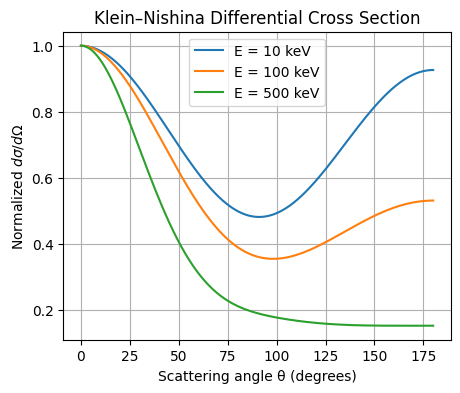

In [ ]:
# Klein–Nishina differential cross-section plot
# Constants
r_e = 2.818e-15        # classical electron radius (m)
m_e_c2 = 511e3          # electron rest energy (eV)

# Klein–Nishina differential cross-section function
def klein_nishina(theta, E):  # theta in radians, E in eV
    alpha = E / m_e_c2
    term1 = (1 / (1 + alpha * (1 - np.cos(theta))))**2
    numerator = (1 + np.cos(theta)**2) + (alpha**2 * (1 - np.cos(theta))**2) / (
        (1 + np.cos(theta)**2) * (1 + alpha * (1 - np.cos(theta)))
    )
    return 0.5 * r_e**2 * term1 * numerator

theta_deg = np.linspace(0, 180, 180)
theta_rad = np.radians(theta_deg)

# Energies to compare (in eV)
energies = [10e3, 100e3, 500e3]  # 10 keV, 100 keV, 500 keV

# Plot
plt.figure(figsise=(5, 4))
for E in energies:
    dsigma = klein_nishina(theta_rad, E)
    plt.plot(theta_deg, dsigma / dsigma.max(), label=f"E = {E/1e3:.0f} keV")

plt.xlabel("Scattering angle θ (degrees)")
plt.ylabel("Normalised $dσ/dΩ$")
plt.title("Klein–Nishina Differential Cross Section")
plt.legend()
plt.grid(True)
plt.show()

## Probability density function

If the incident particle flux is **uniform**, the probability that a scattered particle emerges between angles $\theta$ and $\theta + d\theta$ is proportional to the corresponding differential cross section:

$$
p(\theta)\, d\theta = f(\theta)\, d\theta \propto \frac{d\sigma}{d\theta}\, d\theta
$$

Thus, we can write

$$
f(\theta) = C\, \frac{d\sigma}{d\theta}
$$

where $f(\theta)$ is the **probability density function (PDF)** for scattering into a polar angle $\theta$, and $C$ is a normalization constant.  
To ensure proper normalization of the probability distribution:

$$
\int_0^{\pi} f(\theta)\, d\theta = 1
$$

Substituting $f(\theta)$ gives

$$
1 = C \int_0^{\pi} \frac{d\sigma}{d\theta}\, d\theta = C\, \sigma
$$

where $\sigma$ is the **total scattering cross section**.  
Therefore, the normalization constant is

$$
C = \frac{1}{\sigma}
$$

and the normalized angular probability distribution becomes

$$
\boxed{f(\theta) = \frac{1}{\sigma} \frac{d\sigma}{d\theta}}
$$


The total scattering cross section is defined as the integral of the differential cross section over all solid angles:

$$
\begin{aligned}
\sigma &= \int d\sigma \\
&= \int \frac{d\sigma}{d\Omega}\, d\Omega \\
&= \int_{0}^{2\pi} \int_{0}^{\pi} \frac{d\sigma}{d\Omega}\, \sin\theta\, d\theta\, d\phi
\end{aligned}
$$

Rearranging the integration order gives:

$$
\sigma = \int_{0}^{\pi} \left( \int_{0}^{2\pi} \frac{d\sigma}{d\Omega}\, \sin\theta\, d\phi \right) d\theta
$$

For isotropic targets, the differential cross section $\frac{d\sigma}{d\Omega}$ is typically **independent of the azimuthal angle** $\phi$, so the inner integral simplifies to a factor of $2\pi$:

$$
\sigma = \int_{0}^{\pi} \left( 2\pi \frac{d\sigma}{d\Omega}\, \sin\theta \right) d\theta
$$

By comparison with $\sigma = \int_0^{\pi} \frac{d\sigma}{d\theta}\, d\theta$, we can identify

$$
\boxed{\frac{d\sigma}{d\theta} = 2\pi\, \frac{d\sigma}{d\Omega}\, \sin\theta}
$$


In [19]:
theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)

First, we define $\frac{d\sigma}{d\theta}$ and  $\frac{d\sigma}{d\Omega}$


In [24]:
dsdo = smp.Rational(1,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
            ( 1 + alpha**2 * (1-smp.cos(theta))**2 / ((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
dsdo = dsdo.simplify()
dsdo

(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))/(2*(\alpha*(cos(\theta) - 1) - 1)**3)

In [25]:
dsdt = 2*smp.pi*dsdo*smp.sin(theta)
dsdt = dsdt.simplify()
dsdt

-pi*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

We then compute $\sigma = \int_0^{\pi} \frac{d\sigma}{d\theta} d\theta$.

In [30]:
s = smp.integrate(dsdt, (theta, 0, smp.pi))
s = s.simplify()
s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + log((2*\alpha + 1)**(4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

In [ ]:
pdf_theta = dsdt / s
pdf_theta=pdf_theta.simplify()
pdf_theta

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

## Probability density over solid angle

In three dimensions, the probability density function over both polar and azimuthal angles is given by

$$
\boxed{g(\theta, \phi) = \frac{1}{\sigma} \frac{d\sigma}{d\Omega}}
$$

where $g(\theta, \phi)$ represents the **joint probability density function** (PDF) for scattering into a solid angle element $d\Omega = \sin\theta\, d\theta\, d\phi$.  
This function satisfies the normalization condition over the full sphere:

$$
\int_0^{2\pi}\! \int_0^{\pi} g(\theta, \phi)\, \sin\theta\, d\theta\, d\phi = 1
$$

In [32]:
pdf_omega = dsdo / s
pdf_omega=pdf_omega.simplify()
pdf_omega

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

Lets make some plots. First lets turn the pdf into a numerical function

In [33]:
pdf_theta_f = smp.lambdify([theta,alpha], pdf_theta)
pdf_omega_f = smp.lambdify([theta,alpha], pdf_omega)

In [47]:
theta = np.linspace(0, np.pi, 1000)
alpha = 0.16
pdf_t = pdf_theta_f(theta, alpha)
pdf_o = pdf_omega_f(theta, alpha)

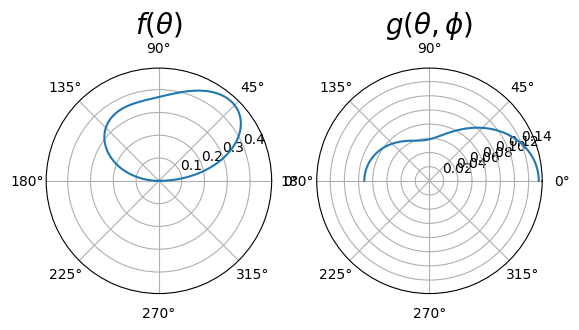

In [48]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(theta, pdf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(theta, pdf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=20)
plt.show()

## Probability density over the Outgoing photon energy $E'$

$$\begin{align}
f(E') &= \frac{1}{\sigma} \frac{d\sigma}{dE'}\\
&= \frac{1}{\sigma} \frac{d\sigma}{d\theta} \left(\frac{dE'}{d\theta}\right)^{-1}\\
\end{align}$$

$$ E' = \frac{E}{1+\alpha(1-\cos\theta)}$$

In [49]:
E, Ep, alpha, T, theta = smp.symbols(r"E E' \alpha T \theta", real=True, positive=True)

In [50]:
Ep_expr = E/(1+alpha*(1-smp.cos(theta)))
Ep_expr

E/(\alpha*(1 - cos(\theta)) + 1)

solve `Ep=Ep_expr` to get $\theta(E')$ for $\left(\frac{dE'}{d\theta}\right)^{-1}$

In [52]:
theta_expr = smp.solve(Ep-Ep_expr, theta)[1]
theta_expr

acos((-E + E'*\alpha + E')/(E'*\alpha))

In [53]:
pdf_Ep = 1/s * dsdt / smp.diff(Ep_expr, theta)
pdf_Ep

\alpha**2*(\alpha*(1 - cos(\theta)) + 1)**2*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(E*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + log((2*\alpha + 1)**(4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2))))

The problem is its expressed in terms of $\theta$ and not $E'$. We can substitute in our $\theta$ expression above to solve this

In [54]:
pdf_Ep = pdf_Ep.subs(theta, theta_expr).simplify()
pdf_Ep

-(E*(E'**2*\alpha**2 + (-E + E'*\alpha + E')**2) + E'*\alpha**2*(E - E')**2)*(4*\alpha**2 + 4*\alpha + 1)/(E**2*E'**2*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

## Probability density over the Outgoing electron energy $T = E - E'$

$$\begin{align}
f(T) &= \frac{1}{\sigma} \frac{d\sigma}{dT}\\
&= \frac{1}{\sigma} \frac{d\sigma}{d\theta} \left(\frac{dT}{d\theta}\right)^{-1}\\
\end{align}$$

$$T = E-E' = \frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$$

In [57]:
T_expr = E*alpha*(1-smp.cos(theta))/(1+alpha*(1-smp.cos(theta)))
theta_expr = smp.solve(T-T_expr, theta)[1]
pdf_T = 1/s * dsdt / smp.diff(T_expr, theta)
pdf_T = pdf_T.subs(theta, theta_expr).simplify()
pdf_T

(\alpha**2*(E - T)*(-E*\alpha + T*\alpha + T + \alpha*(E - T))**2 + (\alpha**2*(E - T)**2 + (-E*\alpha + T*\alpha + T)**2)*(-E*\alpha + E + T*\alpha + \alpha*(E - T)))*(4*\alpha**2 + 4*\alpha + 1)/(E*(-E + T)**2*(-E*\alpha + E + T*\alpha + \alpha*(E - T))*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

In [59]:
pdf_Ep_f = smp.lambdify([Ep, E, alpha], pdf_Ep)
pdf_T_f = smp.lambdify([T, E, alpha], pdf_T)

In [60]:
m = 0.511
alpha = 2
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000)
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

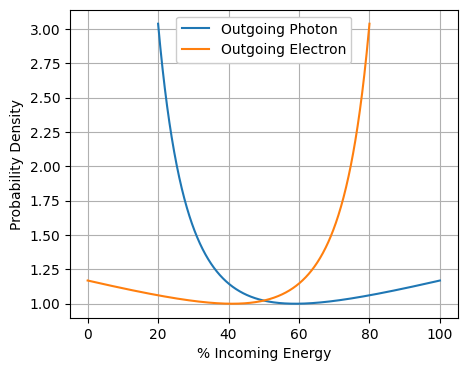

In [69]:
plt.figure(figsize=(5,4))
plt.plot(100*Ep/(E), -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
plt.plot(100*T/(E), pdf_T_f(T, E, alpha), label='Outgoing Electron')
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.show()

Get arrays of pdfs for many different values of $\alpha$

In [83]:
alphas = 10.0** np.linspace(-3,3,300)
Eps = [np.linspace(alpha*m/(1+2*alpha), alpha*m, 300) for alpha in alphas]
Ts = [np.linspace(0, 2*alpha*m*alpha/(1+2*alpha), 300) for alpha in alphas]
pdfs_Ep = [-pdf_Ep_f(Ep, alpha*m, alpha) for (alpha, Ep) in zip(alphas, Eps)]
pdfs_T = [pdf_T_f(T, alpha*m, alpha) for (alpha, T) in zip(alphas, Ts)]

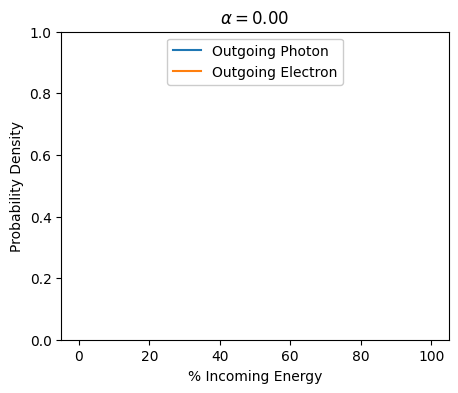

In [84]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

fig, ax = plt.subplots(figsize=(5,4))

def animate(i):
    alpha = alphas[i] 
    Ep=Eps[i]
    T = Ts[i]
    E = m*alpha
    
    ax.clear()
    ax.plot(100*Ep/E, -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
    ax.plot(100*T/E, pdf_T_f(T, E, alpha), label='Outgoing Electron')
    ax.set_xlabel('% Incoming Energy')
    ax.set_ylabel('Probability Density')
    ax.set_ylim(0,1)
    ax.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
    ax.set_title(r'$\alpha=$'+f'{alpha:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('ani4.gif',writer='pillow',fps=30,dpi=100)